In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from tensorflow.keras.utils import img_to_array
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [ ]:
dirs = "train"
root_dir = listdir(dirs)

In [7]:
all_labels = ["Apple___Apple_scab", "Apple___healthy", "Apple___Black_rot", "Apple___Cedar_apple_rust"]
binary_labels = []

for root, dirs, files in os.walk("train/", topdown=False):
    i = 0
    for name in dirs:
        all_labels.append(name)
        binary_labels.append(i)
        i += 1

In [9]:
image_list, label_list = [], []
dirs = "train"
root_dir = listdir(dirs)
all_labels = ["Apple___Apple_scab", "Apple___healthy", "Apple___Black_rot", "Apple___Cedar_apple_rust"]
temp = -1

for directory in all_labels:
    plant_image_list = listdir(f"{dirs}/{directory}")
    temp += 1
    for files in plant_image_list:
        image_path = f"{dirs}/{directory}/{files}"
        try:
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.resize(image, (256, 256))
                image = img_to_array(image)
                
            else:
                image = np.array([])
            
        except Exception as e:
            pass
        
        image_list.append(image)
        label_list.append(binary_labels[temp])

In [13]:
label_list[-1]

3

In [15]:
pd.DataFrame(label_list).value_counts()

0    2016
1    2008
2    1987
3    1760
dtype: int64

In [16]:
image_list[0].shape

(256, 256, 3)

In [17]:
np.array(label_list).shape

(7771,)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=4242)

In [37]:
X_train = np.array(X_train, dtype=np.float16) / 225.0
X_test = np.array(X_test, dtype=np.float16) / 225.0

In [38]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [45]:
model = Sequential()
model.add(Conv2D(32, (4,4), padding="same", input_shape=(256, 256, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Conv2D(16, (4,4), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 256, 256, 32)      1568      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 16)        8208      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 16384)             0         
                                                                 
 dense_8 (Dense)             (None, 8)                

In [46]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(0.0001), metrics=["accuracy"])

In [41]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

In [47]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
39/39 [==============================] - 69s 2s/step - loss: 1.2700 - accuracy: 0.4053 - val_loss: 1.1177 - val_accuracy: 0.5635
Epoch 2/10
39/39 [==============================] - 70s 2s/step - loss: 0.9769 - accuracy: 0.6364 - val_loss: 0.8498 - val_accuracy: 0.6559
Epoch 3/10
39/39 [==============================] - 71s 2s/step - loss: 0.7621 - accuracy: 0.7395 - val_loss: 0.6713 - val_accuracy: 0.7862
Epoch 4/10
39/39 [==============================] - 72s 2s/step - loss: 0.6197 - accuracy: 0.8039 - val_loss: 0.5544 - val_accuracy: 0.8296
Epoch 5/10
39/39 [==============================] - 74s 2s/step - loss: 0.5349 - accuracy: 0.8238 - val_loss: 0.4867 - val_accuracy: 0.8481
Epoch 6/10
39/39 [==============================] - 73s 2s/step - loss: 0.4676 - accuracy: 0.8479 - val_loss: 0.4332 - val_accuracy: 0.8561
Epoch 7/10
39/39 [==============================] - 74s 2s/step - loss: 0.4244 - accuracy: 0.8566 - val_loss: 0.4040 - val_accuracy: 0.8561
Epoch 8/10
39/39 [==

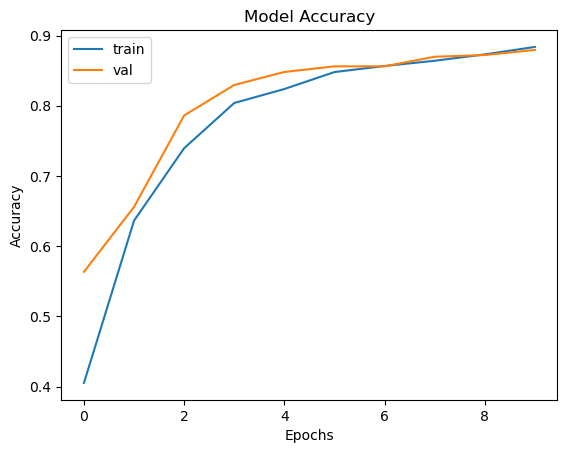

In [49]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])
plt.show()

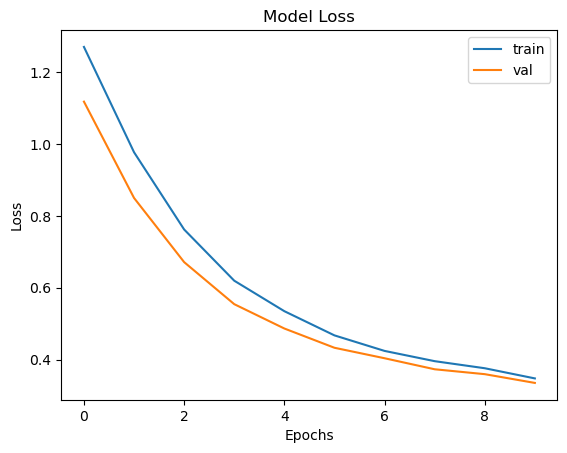

In [50]:
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "val"])
plt.show()

In [48]:
model.save("PlantDiseaseModel.h5")